# Data Description

https://www.kaggle.com/berkayalan/bank-marketing-data-set

# Preparation

Preparation
Correlation
Segmentation
0,6 R Squared

In [ ]:
# Import Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/15TxgttUmZK8-hbO75K0_Rm5yCmW-4pRbT2WFpECk49A/edit#gid=233326813'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
data = pd.read_csv(sheet_url_trf)
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,64,retired,married,basic.4y,no,yes,no,cellular,mar,wed,262,2,999,0,nonexistent,-1.8,93.369,-34.8,0.634,5008.7,yes
1,56,unemployed,divorced,basic.4y,no,no,no,cellular,mar,wed,577,1,999,0,nonexistent,-1.8,93.369,-34.8,0.634,5008.7,yes
2,56,unemployed,divorced,basic.4y,no,yes,no,cellular,mar,wed,170,1,999,1,failure,-1.8,93.369,-34.8,0.634,5008.7,yes
3,56,admin.,single,university.degree,no,no,no,cellular,mar,wed,193,1,5,1,success,-1.8,93.369,-34.8,0.634,5008.7,yes
4,56,admin.,single,university.degree,no,yes,no,cellular,mar,wed,175,1,999,1,failure,-1.8,93.369,-34.8,0.634,5008.7,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,35,entrepreneur,married,university.degree,no,yes,yes,telephone,oct,mon,2429,1,999,0,nonexistent,-0.1,93.797,-40.4,5.000,5195.8,no
41184,48,admin.,married,high.school,no,no,no,telephone,oct,mon,312,1,999,0,nonexistent,-0.1,93.797,-40.4,5.000,5195.8,yes
41185,41,technician,divorced,professional.course,no,unknown,unknown,telephone,oct,mon,73,1,999,0,nonexistent,-0.1,93.797,-40.4,5.000,5195.8,no
41186,30,admin.,single,university.degree,no,yes,yes,telephone,oct,mon,718,1,999,0,nonexistent,-0.1,93.797,-40.4,5.000,5195.8,yes


# Eksplorasi Data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
print(data.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscribed        0
dtype: int64


## Statistic Summary

In [ ]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575346,-40.502600,3.620932,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578932,4.628198,1.734890,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.161000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## Duplicate Handling

In [ ]:
data.duplicated().sum()

12

In [ ]:
data = data.drop_duplicates()
data.duplicated().sum()

0

## Outlier Handling

In [ ]:
data['duration_z']=stats.zscore(data['duration'])
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed,duration_z
0,64,retired,married,basic.4y,no,yes,no,cellular,mar,wed,262,2,999,0,nonexistent,-1.8,93.369,-34.8,0.634,5008.7,yes,0.014208
1,56,unemployed,divorced,basic.4y,no,no,no,cellular,mar,wed,577,1,999,0,nonexistent,-1.8,93.369,-34.8,0.634,5008.7,yes,1.229007
2,56,unemployed,divorced,basic.4y,no,yes,no,cellular,mar,wed,170,1,999,1,failure,-1.8,93.369,-34.8,0.634,5008.7,yes,-0.340590
3,56,admin.,single,university.degree,no,no,no,cellular,mar,wed,193,1,5,1,success,-1.8,93.369,-34.8,0.634,5008.7,yes,-0.251891
4,56,admin.,single,university.degree,no,yes,no,cellular,mar,wed,175,1,999,1,failure,-1.8,93.369,-34.8,0.634,5008.7,yes,-0.321308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,35,entrepreneur,married,university.degree,no,yes,yes,telephone,oct,mon,2429,1,999,0,nonexistent,-0.1,93.797,-40.4,5.000,5195.8,no,8.371253
41184,48,admin.,married,high.school,no,no,no,telephone,oct,mon,312,1,999,0,nonexistent,-0.1,93.797,-40.4,5.000,5195.8,yes,0.207033
41185,41,technician,divorced,professional.course,no,unknown,unknown,telephone,oct,mon,73,1,999,0,nonexistent,-0.1,93.797,-40.4,5.000,5195.8,no,-0.714671
41186,30,admin.,single,university.degree,no,yes,yes,telephone,oct,mon,718,1,999,0,nonexistent,-0.1,93.797,-40.4,5.000,5195.8,yes,1.772774


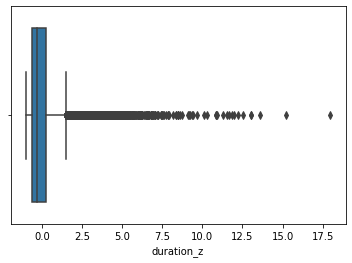

In [ ]:
ax = sns.boxplot(x=data["duration_z"])

In [ ]:
data = data.loc[data['duration_z'].abs()<=3]
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed,duration_z
0,64,retired,married,basic.4y,no,yes,no,cellular,mar,wed,262,2,999,0,nonexistent,-1.8,93.369,-34.8,0.634,5008.7,yes,0.014208
1,56,unemployed,divorced,basic.4y,no,no,no,cellular,mar,wed,577,1,999,0,nonexistent,-1.8,93.369,-34.8,0.634,5008.7,yes,1.229007
2,56,unemployed,divorced,basic.4y,no,yes,no,cellular,mar,wed,170,1,999,1,failure,-1.8,93.369,-34.8,0.634,5008.7,yes,-0.340590
3,56,admin.,single,university.degree,no,no,no,cellular,mar,wed,193,1,5,1,success,-1.8,93.369,-34.8,0.634,5008.7,yes,-0.251891
4,56,admin.,single,university.degree,no,yes,no,cellular,mar,wed,175,1,999,1,failure,-1.8,93.369,-34.8,0.634,5008.7,yes,-0.321308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,52,technician,married,professional.course,no,yes,yes,telephone,oct,mon,164,1,999,0,nonexistent,-0.1,93.797,-40.4,5.000,5195.8,no,-0.363729
41182,35,management,married,university.degree,no,yes,no,telephone,oct,mon,309,1,999,0,nonexistent,-0.1,93.797,-40.4,5.000,5195.8,no,0.195464
41184,48,admin.,married,high.school,no,no,no,telephone,oct,mon,312,1,999,0,nonexistent,-0.1,93.797,-40.4,5.000,5195.8,yes,0.207033
41185,41,technician,divorced,professional.course,no,unknown,unknown,telephone,oct,mon,73,1,999,0,nonexistent,-0.1,93.797,-40.4,5.000,5195.8,no,-0.714671


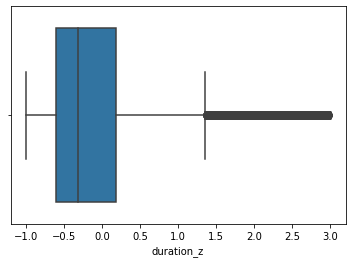

In [ ]:
ax = sns.boxplot(x=data["duration_z"])

In [ ]:
data['campaign_z']=stats.zscore(data['campaign'])
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed,duration_z,campaign_z
0,64,retired,married,basic.4y,no,yes,no,cellular,mar,wed,262,2,999,0,nonexistent,-1.8,93.369,-34.8,0.634,5008.7,yes,0.014208,-0.204016
1,56,unemployed,divorced,basic.4y,no,no,no,cellular,mar,wed,577,1,999,0,nonexistent,-1.8,93.369,-34.8,0.634,5008.7,yes,1.229007,-0.563921
2,56,unemployed,divorced,basic.4y,no,yes,no,cellular,mar,wed,170,1,999,1,failure,-1.8,93.369,-34.8,0.634,5008.7,yes,-0.340590,-0.563921
3,56,admin.,single,university.degree,no,no,no,cellular,mar,wed,193,1,5,1,success,-1.8,93.369,-34.8,0.634,5008.7,yes,-0.251891,-0.563921
4,56,admin.,single,university.degree,no,yes,no,cellular,mar,wed,175,1,999,1,failure,-1.8,93.369,-34.8,0.634,5008.7,yes,-0.321308,-0.563921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,52,technician,married,professional.course,no,yes,yes,telephone,oct,mon,164,1,999,0,nonexistent,-0.1,93.797,-40.4,5.000,5195.8,no,-0.363729,-0.563921
41182,35,management,married,university.degree,no,yes,no,telephone,oct,mon,309,1,999,0,nonexistent,-0.1,93.797,-40.4,5.000,5195.8,no,0.195464,-0.563921
41184,48,admin.,married,high.school,no,no,no,telephone,oct,mon,312,1,999,0,nonexistent,-0.1,93.797,-40.4,5.000,5195.8,yes,0.207033,-0.563921
41185,41,technician,divorced,professional.course,no,unknown,unknown,telephone,oct,mon,73,1,999,0,nonexistent,-0.1,93.797,-40.4,5.000,5195.8,no,-0.714671,-0.563921


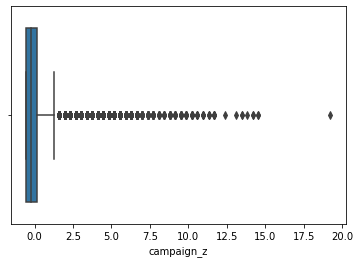

In [ ]:
ax = sns.boxplot(x=data["campaign_z"])

In [ ]:
data = data.loc[data['campaign_z'].abs()<=3]
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed,duration_z,campaign_z
0,64,retired,married,basic.4y,no,yes,no,cellular,mar,wed,262,2,999,0,nonexistent,-1.8,93.369,-34.8,0.634,5008.7,yes,0.014208,-0.204016
1,56,unemployed,divorced,basic.4y,no,no,no,cellular,mar,wed,577,1,999,0,nonexistent,-1.8,93.369,-34.8,0.634,5008.7,yes,1.229007,-0.563921
2,56,unemployed,divorced,basic.4y,no,yes,no,cellular,mar,wed,170,1,999,1,failure,-1.8,93.369,-34.8,0.634,5008.7,yes,-0.340590,-0.563921
3,56,admin.,single,university.degree,no,no,no,cellular,mar,wed,193,1,5,1,success,-1.8,93.369,-34.8,0.634,5008.7,yes,-0.251891,-0.563921
4,56,admin.,single,university.degree,no,yes,no,cellular,mar,wed,175,1,999,1,failure,-1.8,93.369,-34.8,0.634,5008.7,yes,-0.321308,-0.563921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,52,technician,married,professional.course,no,yes,yes,telephone,oct,mon,164,1,999,0,nonexistent,-0.1,93.797,-40.4,5.000,5195.8,no,-0.363729,-0.563921
41182,35,management,married,university.degree,no,yes,no,telephone,oct,mon,309,1,999,0,nonexistent,-0.1,93.797,-40.4,5.000,5195.8,no,0.195464,-0.563921
41184,48,admin.,married,high.school,no,no,no,telephone,oct,mon,312,1,999,0,nonexistent,-0.1,93.797,-40.4,5.000,5195.8,yes,0.207033,-0.563921
41185,41,technician,divorced,professional.course,no,unknown,unknown,telephone,oct,mon,73,1,999,0,nonexistent,-0.1,93.797,-40.4,5.000,5195.8,no,-0.714671,-0.563921


In [ ]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,duration_z,campaign_z
count,39461.000000,39461.000000,39461.000000,39461.000000,39461.000000,39461.000000,39461.000000,39461.000000,39461.000000,39461.000000,39461.000000,39461.000000
mean,40.024987,236.245990,2.271255,961.631079,0.177593,0.056775,93.566937,-40.498386,3.595003,5165.928590,-0.085112,-0.106390
std,10.440731,191.472482,1.719308,188.977798,0.501478,1.576181,0.579664,4.655198,1.741970,72.541294,0.738414,0.618788
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.161000,4963.600000,-0.996196,-0.563921
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000,-0.598976,-0.563921
50%,38.000000,178.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000,-0.309738,-0.204016
75%,47.000000,308.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.191607,0.155889
max,98.000000,1036.000000,10.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,2.999143,2.675225


## Numerical Data

In [ ]:
data['pdays'] = data['pdays'] + 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,duration_z,campaign_z
count,39461.000000,39461.000000,39461.000000,39461.000000,39461.000000,39461.000000,39461.000000,39461.000000,39461.000000,39461.000000,39461.000000,39461.000000
mean,40.024987,236.245990,2.271255,962.631079,0.177593,0.056775,93.566937,-40.498386,3.595003,5165.928590,-0.085112,-0.106390
std,10.440731,191.472482,1.719308,188.977798,0.501478,1.576181,0.579664,4.655198,1.741970,72.541294,0.738414,0.618788
min,17.000000,0.000000,1.000000,1.000000,0.000000,-3.400000,92.201000,-50.800000,0.161000,4963.600000,-0.996196,-0.563921
25%,32.000000,103.000000,1.000000,1000.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000,-0.598976,-0.563921
50%,38.000000,178.000000,2.000000,1000.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000,-0.309738,-0.204016
75%,47.000000,308.000000,3.000000,1000.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.191607,0.155889
max,98.000000,1036.000000,10.000000,1000.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,2.999143,2.675225


In [ ]:
# Replace
data.replace({'pdays' : {1000: 0}}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [ ]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,duration_z,campaign_z
count,39461.000000,39461.000000,39461.000000,39461.000000,39461.000000,39461.000000,39461.000000,39461.000000,39461.000000,39461.000000,39461.000000,39461.000000
mean,40.024987,236.245990,2.271255,0.263171,0.177593,0.056775,93.566937,-40.498386,3.595003,5165.928590,-0.085112,-0.106390
std,10.440731,191.472482,1.719308,1.523211,0.501478,1.576181,0.579664,4.655198,1.741970,72.541294,0.738414,0.618788
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.161000,4963.600000,-0.996196,-0.563921
25%,32.000000,103.000000,1.000000,0.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000,-0.598976,-0.563921
50%,38.000000,178.000000,2.000000,0.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000,-0.309738,-0.204016
75%,47.000000,308.000000,3.000000,0.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.191607,0.155889
max,98.000000,1036.000000,10.000000,28.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,2.999143,2.675225


## Categorical Data

### Variable Check

In [ ]:
print(data.nunique())

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1029
campaign            10
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          305
nr.employed         11
subscribed           2
duration_z        1029
campaign_z          10
dtype: int64


In [ ]:
data['default'].value_counts()

no         31264
unknown     8194
yes            3
Name: default, dtype: int64

In [ ]:
data['housing'].value_counts()

yes        20717
no         17795
unknown      949
Name: housing, dtype: int64

In [ ]:
data['loan'].value_counts()

no         32537
yes         5975
unknown      949
Name: loan, dtype: int64

In [ ]:
data['subscribed'].value_counts()

no     35357
yes     4104
Name: subscribed, dtype: int64

In [ ]:
data.drop(data.loc[data['housing']=='unknown'].index, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
data.drop(data.loc[data['loan']=='unknown'].index, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
data_nonlabel = data

### Labeling

In [ ]:
data = data.replace({'housing' : {'no': 0, 'yes': 1}})
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed,duration_z,campaign_z
0,64,retired,married,basic.4y,no,1,no,cellular,mar,wed,262,2,0,0,nonexistent,-1.8,93.369,-34.8,0.634,5008.7,yes,0.014208,-0.204016
1,56,unemployed,divorced,basic.4y,no,0,no,cellular,mar,wed,577,1,0,0,nonexistent,-1.8,93.369,-34.8,0.634,5008.7,yes,1.229007,-0.563921
2,56,unemployed,divorced,basic.4y,no,1,no,cellular,mar,wed,170,1,0,1,failure,-1.8,93.369,-34.8,0.634,5008.7,yes,-0.340590,-0.563921
3,56,admin.,single,university.degree,no,0,no,cellular,mar,wed,193,1,6,1,success,-1.8,93.369,-34.8,0.634,5008.7,yes,-0.251891,-0.563921
4,56,admin.,single,university.degree,no,1,no,cellular,mar,wed,175,1,0,1,failure,-1.8,93.369,-34.8,0.634,5008.7,yes,-0.321308,-0.563921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,47,technician,married,professional.course,no,0,no,cellular,aug,mon,428,2,0,0,nonexistent,1.4,93.444,-36.1,4.970,5228.1,no,0.654388,-0.204016
41181,52,technician,married,professional.course,no,1,yes,telephone,oct,mon,164,1,0,0,nonexistent,-0.1,93.797,-40.4,5.000,5195.8,no,-0.363729,-0.563921
41182,35,management,married,university.degree,no,1,no,telephone,oct,mon,309,1,0,0,nonexistent,-0.1,93.797,-40.4,5.000,5195.8,no,0.195464,-0.563921
41184,48,admin.,married,high.school,no,0,no,telephone,oct,mon,312,1,0,0,nonexistent,-0.1,93.797,-40.4,5.000,5195.8,yes,0.207033,-0.563921


In [ ]:
data = data.replace({'loan' : {'no': 0, 'yes': 1}})
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed,duration_z,campaign_z
0,64,retired,married,basic.4y,no,1,0,cellular,mar,wed,262,2,0,0,nonexistent,-1.8,93.369,-34.8,0.634,5008.7,yes,0.014208,-0.204016
1,56,unemployed,divorced,basic.4y,no,0,0,cellular,mar,wed,577,1,0,0,nonexistent,-1.8,93.369,-34.8,0.634,5008.7,yes,1.229007,-0.563921
2,56,unemployed,divorced,basic.4y,no,1,0,cellular,mar,wed,170,1,0,1,failure,-1.8,93.369,-34.8,0.634,5008.7,yes,-0.340590,-0.563921
3,56,admin.,single,university.degree,no,0,0,cellular,mar,wed,193,1,6,1,success,-1.8,93.369,-34.8,0.634,5008.7,yes,-0.251891,-0.563921
4,56,admin.,single,university.degree,no,1,0,cellular,mar,wed,175,1,0,1,failure,-1.8,93.369,-34.8,0.634,5008.7,yes,-0.321308,-0.563921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,47,technician,married,professional.course,no,0,0,cellular,aug,mon,428,2,0,0,nonexistent,1.4,93.444,-36.1,4.970,5228.1,no,0.654388,-0.204016
41181,52,technician,married,professional.course,no,1,1,telephone,oct,mon,164,1,0,0,nonexistent,-0.1,93.797,-40.4,5.000,5195.8,no,-0.363729,-0.563921
41182,35,management,married,university.degree,no,1,0,telephone,oct,mon,309,1,0,0,nonexistent,-0.1,93.797,-40.4,5.000,5195.8,no,0.195464,-0.563921
41184,48,admin.,married,high.school,no,0,0,telephone,oct,mon,312,1,0,0,nonexistent,-0.1,93.797,-40.4,5.000,5195.8,yes,0.207033,-0.563921


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
cols = ['contact', 'poutcome']
#
# Encode labels of multiple columns at once
#
data[cols] = data[cols].apply(LabelEncoder().fit_transform)
#
# Print head
#
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed,duration_z,campaign_z
0,64,retired,married,basic.4y,no,1,0,0,mar,wed,262,2,0,0,1,-1.8,93.369,-34.8,0.634,5008.7,yes,0.014208,-0.204016
1,56,unemployed,divorced,basic.4y,no,0,0,0,mar,wed,577,1,0,0,1,-1.8,93.369,-34.8,0.634,5008.7,yes,1.229007,-0.563921
2,56,unemployed,divorced,basic.4y,no,1,0,0,mar,wed,170,1,0,1,0,-1.8,93.369,-34.8,0.634,5008.7,yes,-0.340590,-0.563921
3,56,admin.,single,university.degree,no,0,0,0,mar,wed,193,1,6,1,2,-1.8,93.369,-34.8,0.634,5008.7,yes,-0.251891,-0.563921
4,56,admin.,single,university.degree,no,1,0,0,mar,wed,175,1,0,1,0,-1.8,93.369,-34.8,0.634,5008.7,yes,-0.321308,-0.563921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,47,technician,married,professional.course,no,0,0,0,aug,mon,428,2,0,0,1,1.4,93.444,-36.1,4.970,5228.1,no,0.654388,-0.204016
41181,52,technician,married,professional.course,no,1,1,1,oct,mon,164,1,0,0,1,-0.1,93.797,-40.4,5.000,5195.8,no,-0.363729,-0.563921
41182,35,management,married,university.degree,no,1,0,1,oct,mon,309,1,0,0,1,-0.1,93.797,-40.4,5.000,5195.8,no,0.195464,-0.563921
41184,48,admin.,married,high.school,no,0,0,1,oct,mon,312,1,0,0,1,-0.1,93.797,-40.4,5.000,5195.8,yes,0.207033,-0.563921


In [ ]:
# mmm to mm
data.replace({'month' : {'jan': 1 ,'feb': 2 ,'mar': 3 ,'apr': 4 ,'may': 5 ,'jun': 6 ,'jul': 7 ,'aug': 8 ,'sep': 9 ,'oct': 10 ,'nov': 11 ,'dec': 12 ,}}, inplace=True) 
data['month'].value_counts()

5     12998
7      6551
8      5791
6      4816
11     3941
4      2502
10      681
9       540
3       522
12      170
Name: month, dtype: int64

In [ ]:
# mmm to mm
data.replace({'day_of_week' : {'mon': 1 ,'tue': 2 ,'wed': 3 ,'thu': 4 ,'fri': 5}}, inplace=True) 
data['day_of_week'].value_counts()

1    8023
4    8019
3    7624
2    7574
5    7272
Name: day_of_week, dtype: int64

In [ ]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed,duration_z,campaign_z
0,64,retired,married,basic.4y,no,1,0,0,3,3,262,2,0,0,1,-1.8,93.369,-34.8,0.634,5008.7,yes,0.014208,-0.204016
1,56,unemployed,divorced,basic.4y,no,0,0,0,3,3,577,1,0,0,1,-1.8,93.369,-34.8,0.634,5008.7,yes,1.229007,-0.563921
2,56,unemployed,divorced,basic.4y,no,1,0,0,3,3,170,1,0,1,0,-1.8,93.369,-34.8,0.634,5008.7,yes,-0.340590,-0.563921
3,56,admin.,single,university.degree,no,0,0,0,3,3,193,1,6,1,2,-1.8,93.369,-34.8,0.634,5008.7,yes,-0.251891,-0.563921
4,56,admin.,single,university.degree,no,1,0,0,3,3,175,1,0,1,0,-1.8,93.369,-34.8,0.634,5008.7,yes,-0.321308,-0.563921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,47,technician,married,professional.course,no,0,0,0,8,1,428,2,0,0,1,1.4,93.444,-36.1,4.970,5228.1,no,0.654388,-0.204016
41181,52,technician,married,professional.course,no,1,1,1,10,1,164,1,0,0,1,-0.1,93.797,-40.4,5.000,5195.8,no,-0.363729,-0.563921
41182,35,management,married,university.degree,no,1,0,1,10,1,309,1,0,0,1,-0.1,93.797,-40.4,5.000,5195.8,no,0.195464,-0.563921
41184,48,admin.,married,high.school,no,0,0,1,10,1,312,1,0,0,1,-0.1,93.797,-40.4,5.000,5195.8,yes,0.207033,-0.563921


In [ ]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed,duration_z,campaign_z
0,64,retired,married,basic.4y,no,1,0,0,3,3,262,2,0,0,1,-1.8,93.369,-34.8,0.634,5008.7,yes,0.014208,-0.204016
1,56,unemployed,divorced,basic.4y,no,0,0,0,3,3,577,1,0,0,1,-1.8,93.369,-34.8,0.634,5008.7,yes,1.229007,-0.563921
2,56,unemployed,divorced,basic.4y,no,1,0,0,3,3,170,1,0,1,0,-1.8,93.369,-34.8,0.634,5008.7,yes,-0.340590,-0.563921
3,56,admin.,single,university.degree,no,0,0,0,3,3,193,1,6,1,2,-1.8,93.369,-34.8,0.634,5008.7,yes,-0.251891,-0.563921
4,56,admin.,single,university.degree,no,1,0,0,3,3,175,1,0,1,0,-1.8,93.369,-34.8,0.634,5008.7,yes,-0.321308,-0.563921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,47,technician,married,professional.course,no,0,0,0,8,1,428,2,0,0,1,1.4,93.444,-36.1,4.970,5228.1,no,0.654388,-0.204016
41181,52,technician,married,professional.course,no,1,1,1,10,1,164,1,0,0,1,-0.1,93.797,-40.4,5.000,5195.8,no,-0.363729,-0.563921
41182,35,management,married,university.degree,no,1,0,1,10,1,309,1,0,0,1,-0.1,93.797,-40.4,5.000,5195.8,no,0.195464,-0.563921
41184,48,admin.,married,high.school,no,0,0,1,10,1,312,1,0,0,1,-0.1,93.797,-40.4,5.000,5195.8,yes,0.207033,-0.563921


In [ ]:
data.replace({'marital' : {'married': 1 ,'single': 0 ,'divorced': 0 ,'unknown': 0}}, inplace=True) 
data['marital'].value_counts()

1    23307
0    15205
Name: marital, dtype: int64

In [ ]:
data = data.replace({'subscribed' : {'no': 0, 'yes': 1}})
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed,duration_z,campaign_z
0,64,retired,1,basic.4y,no,1,0,0,3,3,262,2,0,0,1,-1.8,93.369,-34.8,0.634,5008.7,1,0.014208,-0.204016
1,56,unemployed,0,basic.4y,no,0,0,0,3,3,577,1,0,0,1,-1.8,93.369,-34.8,0.634,5008.7,1,1.229007,-0.563921
2,56,unemployed,0,basic.4y,no,1,0,0,3,3,170,1,0,1,0,-1.8,93.369,-34.8,0.634,5008.7,1,-0.340590,-0.563921
3,56,admin.,0,university.degree,no,0,0,0,3,3,193,1,6,1,2,-1.8,93.369,-34.8,0.634,5008.7,1,-0.251891,-0.563921
4,56,admin.,0,university.degree,no,1,0,0,3,3,175,1,0,1,0,-1.8,93.369,-34.8,0.634,5008.7,1,-0.321308,-0.563921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,47,technician,1,professional.course,no,0,0,0,8,1,428,2,0,0,1,1.4,93.444,-36.1,4.970,5228.1,0,0.654388,-0.204016
41181,52,technician,1,professional.course,no,1,1,1,10,1,164,1,0,0,1,-0.1,93.797,-40.4,5.000,5195.8,0,-0.363729,-0.563921
41182,35,management,1,university.degree,no,1,0,1,10,1,309,1,0,0,1,-0.1,93.797,-40.4,5.000,5195.8,0,0.195464,-0.563921
41184,48,admin.,1,high.school,no,0,0,1,10,1,312,1,0,0,1,-0.1,93.797,-40.4,5.000,5195.8,1,0.207033,-0.563921


In [ ]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed,duration_z,campaign_z
0,64,retired,1,basic.4y,no,1,0,0,3,3,262,2,0,0,1,-1.8,93.369,-34.8,0.634,5008.7,1,0.014208,-0.204016
1,56,unemployed,0,basic.4y,no,0,0,0,3,3,577,1,0,0,1,-1.8,93.369,-34.8,0.634,5008.7,1,1.229007,-0.563921
2,56,unemployed,0,basic.4y,no,1,0,0,3,3,170,1,0,1,0,-1.8,93.369,-34.8,0.634,5008.7,1,-0.340590,-0.563921
3,56,admin.,0,university.degree,no,0,0,0,3,3,193,1,6,1,2,-1.8,93.369,-34.8,0.634,5008.7,1,-0.251891,-0.563921
4,56,admin.,0,university.degree,no,1,0,0,3,3,175,1,0,1,0,-1.8,93.369,-34.8,0.634,5008.7,1,-0.321308,-0.563921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,47,technician,1,professional.course,no,0,0,0,8,1,428,2,0,0,1,1.4,93.444,-36.1,4.970,5228.1,0,0.654388,-0.204016
41181,52,technician,1,professional.course,no,1,1,1,10,1,164,1,0,0,1,-0.1,93.797,-40.4,5.000,5195.8,0,-0.363729,-0.563921
41182,35,management,1,university.degree,no,1,0,1,10,1,309,1,0,0,1,-0.1,93.797,-40.4,5.000,5195.8,0,0.195464,-0.563921
41184,48,admin.,1,high.school,no,0,0,1,10,1,312,1,0,0,1,-0.1,93.797,-40.4,5.000,5195.8,1,0.207033,-0.563921


In [ ]:
data = data.drop(columns = ['duration_z','campaign_z'])
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,64,retired,1,basic.4y,no,1,0,0,3,3,262,2,0,0,1,-1.8,93.369,-34.8,0.634,5008.7,1
1,56,unemployed,0,basic.4y,no,0,0,0,3,3,577,1,0,0,1,-1.8,93.369,-34.8,0.634,5008.7,1
2,56,unemployed,0,basic.4y,no,1,0,0,3,3,170,1,0,1,0,-1.8,93.369,-34.8,0.634,5008.7,1
3,56,admin.,0,university.degree,no,0,0,0,3,3,193,1,6,1,2,-1.8,93.369,-34.8,0.634,5008.7,1
4,56,admin.,0,university.degree,no,1,0,0,3,3,175,1,0,1,0,-1.8,93.369,-34.8,0.634,5008.7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,47,technician,1,professional.course,no,0,0,0,8,1,428,2,0,0,1,1.4,93.444,-36.1,4.970,5228.1,0
41181,52,technician,1,professional.course,no,1,1,1,10,1,164,1,0,0,1,-0.1,93.797,-40.4,5.000,5195.8,0
41182,35,management,1,university.degree,no,1,0,1,10,1,309,1,0,0,1,-0.1,93.797,-40.4,5.000,5195.8,0
41184,48,admin.,1,high.school,no,0,0,1,10,1,312,1,0,0,1,-0.1,93.797,-40.4,5.000,5195.8,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38512 entries, 0 to 41186
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             38512 non-null  int64  
 1   job             38512 non-null  object 
 2   marital         38512 non-null  int64  
 3   education       38512 non-null  object 
 4   default         38512 non-null  object 
 5   housing         38512 non-null  int64  
 6   loan            38512 non-null  int64  
 7   contact         38512 non-null  int64  
 8   month           38512 non-null  int64  
 9   day_of_week     38512 non-null  int64  
 10  duration        38512 non-null  int64  
 11  campaign        38512 non-null  int64  
 12  pdays           38512 non-null  int64  
 13  previous        38512 non-null  int64  
 14  poutcome        38512 non-null  int64  
 15  emp.var.rate    38512 non-null  float64
 16  cons.price.idx  38512 non-null  float64
 17  cons.conf.idx   38512 non-null 

# Extract CSV

In [ ]:
cluster = ['housing','loan','poutcome', 'emp.var.rate','cons.price.idx','cons.conf.idx','subscribed']

emp.var.rate = employment variation rate
cons.price.idx = consumer price index
cons.conf.idx = consumer confidence index

In [ ]:
correlation = data[cluster].corr()

In [ ]:
correlation

,housing,loan,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,subscribed
housing,1.000000,0.047160,-0.011575,-0.060458,-0.080013,-0.033735,0.013559
loan,0.047160,1.000000,-0.000593,0.000721,-0.005473,-0.013138,-0.006500
poutcome,-0.011575,-0.000593,1.000000,0.189728,0.211297,0.181142,0.138364
emp.var.rate,-0.060458,0.000721,0.189728,1.000000,0.774515,0.198056,-0.317907
cons.price.idx,-0.080013,-0.005473,0.211297,0.774515,1.000000,0.062606,-0.145233
cons.conf.idx,-0.033735,-0.013138,0.181142,0.198056,0.062606,1.000000,0.063355
subscribed,0.013559,-0.006500,0.138364,-0.317907,-0.145233,0.063355,1.000000


In [ ]:
correlation = correlation['subscribed']

In [ ]:
correlation

housing           0.013559
loan             -0.006500
poutcome          0.138364
emp.var.rate     -0.317907
cons.price.idx   -0.145233
cons.conf.idx     0.063355
subscribed        1.000000
Name: subscribed, dtype: float64

In [ ]:
correl = correlation.abs().rank(ascending=1)

In [ ]:
correlation['rank'] = correl

In [ ]:
correl

housing           2.0
loan              1.0
poutcome          4.0
emp.var.rate      6.0
cons.price.idx    5.0
cons.conf.idx     3.0
subscribed        7.0
Name: subscribed, dtype: float64

In [ ]:
data.to_csv ('clean.csv', index = False, header=True)

In [ ]:
data_nonlabel.to_csv ('clean_label.csv', index = False, header=True)

# Clustering

In [ ]:
finance = ['housing','loan','emp.var.rate','cons.price.idx','cons.conf.idx']

In [ ]:
df_cluster = data[finance]
df_cluster

,housing,loan,emp.var.rate,cons.price.idx,cons.conf.idx
0,1,0,-1.8,93.369,-34.8
1,0,0,-1.8,93.369,-34.8
2,1,0,-1.8,93.369,-34.8
3,0,0,-1.8,93.369,-34.8
4,1,0,-1.8,93.369,-34.8
...,...,...,...,...,...
41180,0,0,1.4,93.444,-36.1
41181,1,1,-0.1,93.797,-40.4
41182,1,0,-0.1,93.797,-40.4
41184,0,0,-0.1,93.797,-40.4


In [ ]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38512 entries, 0 to 41186
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   housing         38512 non-null  int64  
 1   loan            38512 non-null  int64  
 2   emp.var.rate    38512 non-null  float64
 3   cons.price.idx  38512 non-null  float64
 4   cons.conf.idx   38512 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 3.0 MB


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import cluster

<Figure size 1152x576 with 0 Axes>

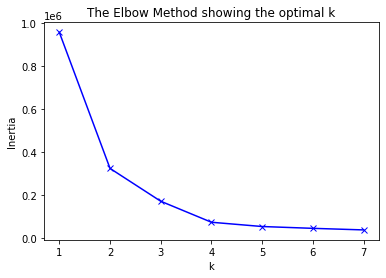

In [ ]:
import matplotlib.pyplot as plt
distortions = []
K = range(1,8)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k)
    kmeanModel.fit(df_cluster)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.figure()
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for n_cluster in range(2, 8):
    kmeans = KMeans(n_clusters=n_cluster).fit(df_cluster)
    label = kmeans.labels_
    sil_coeff = silhouette_score(df_cluster, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.6265358242401412
For n_clusters=3, The Silhouette Coefficient is 0.6753008112854455
For n_clusters=4, The Silhouette Coefficient is 0.7279998058912042
For n_clusters=5, The Silhouette Coefficient is 0.7133471370173593
For n_clusters=6, The Silhouette Coefficient is 0.6746830536090292
For n_clusters=7, The Silhouette Coefficient is 0.6731404259703504


For n_clusters = 2 The average silhouette_score is : 0.6265358242401412
For n_clusters = 3 The average silhouette_score is : 0.6753008112854455
For n_clusters = 4 The average silhouette_score is : 0.7279998058912042


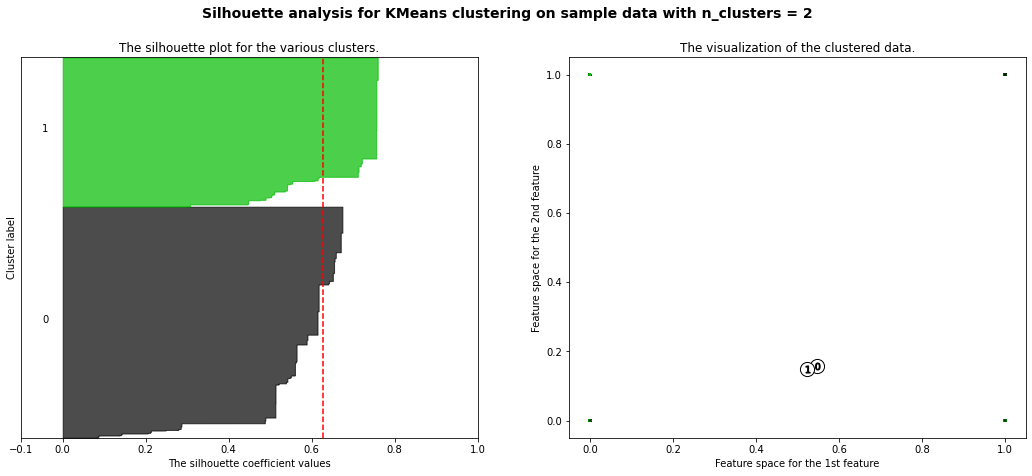

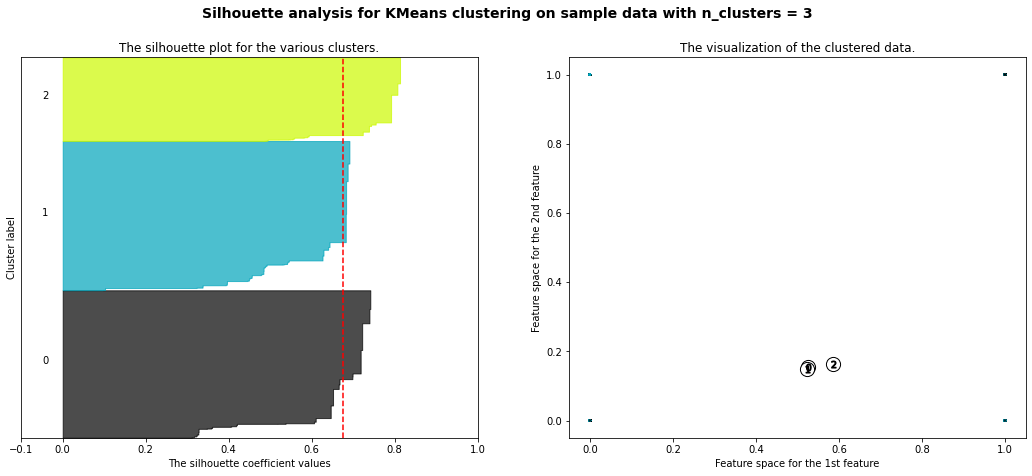

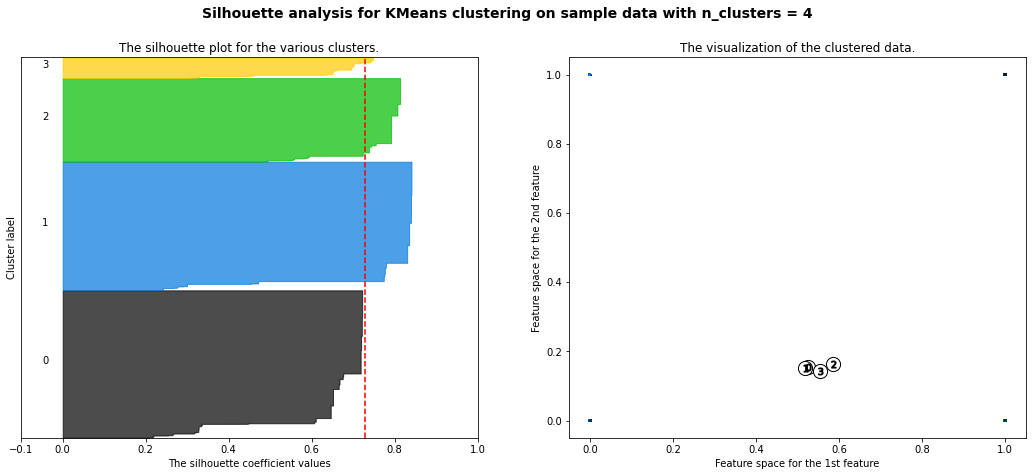

In [ ]:
from silhoutte import silhoutte_analysis
silhoutte_analysis(df_cluster,[2, 3, 4])

In [ ]:
from sklearn.cluster import KMeans
cluster_model = cluster.KMeans(n_clusters=3)
cluster_array = cluster_model.fit(df_cluster)
cluster_label = cluster_model.labels_
data['cluster'] = cluster_label

In [ ]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed,cluster
0,64,retired,1,basic.4y,no,1,0,0,3,3,262,2,0,0,1,-1.8,93.369,-34.8,0.634,5008.7,1,1
1,56,unemployed,0,basic.4y,no,0,0,0,3,3,577,1,0,0,1,-1.8,93.369,-34.8,0.634,5008.7,1,1
2,56,unemployed,0,basic.4y,no,1,0,0,3,3,170,1,0,1,0,-1.8,93.369,-34.8,0.634,5008.7,1,1
3,56,admin.,0,university.degree,no,0,0,0,3,3,193,1,6,1,2,-1.8,93.369,-34.8,0.634,5008.7,1,1
4,56,admin.,0,university.degree,no,1,0,0,3,3,175,1,0,1,0,-1.8,93.369,-34.8,0.634,5008.7,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,47,technician,1,professional.course,no,0,0,0,8,1,428,2,0,0,1,1.4,93.444,-36.1,4.970,5228.1,0,1
41181,52,technician,1,professional.course,no,1,1,1,10,1,164,1,0,0,1,-0.1,93.797,-40.4,5.000,5195.8,0,0
41182,35,management,1,university.degree,no,1,0,1,10,1,309,1,0,0,1,-0.1,93.797,-40.4,5.000,5195.8,0,0
41184,48,admin.,1,high.school,no,0,0,1,10,1,312,1,0,0,1,-0.1,93.797,-40.4,5.000,5195.8,1,0


In [ ]:
data['cluster'].value_counts()

1    15112
0    14936
2     8464
Name: cluster, dtype: int64

In [ ]:
data.groupby('cluster').mean()

,age,marital,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
cluster,,,,,,,,,,,,,,,,,,
0,39.716591,0.593800,0.525777,0.155999,0.363819,7.593465,2.939073,233.218867,2.345273,0.168117,0.112413,0.957284,0.698045,93.857637,-42.077437,4.384678,5202.318492,0.082887
1,41.335495,0.645249,0.522697,0.150212,0.515484,6.620302,2.982266,235.977832,2.253375,0.340259,0.140881,0.994111,0.444673,93.588936,-35.472016,4.081550,5170.206465,0.110574
2,38.227316,0.553757,0.586602,0.162453,0.077032,4.872873,3.014296,243.042769,2.171668,0.294660,0.356687,0.760751,-1.771727,93.007601,-46.710326,1.328059,5094.084345,0.129726


In [ ]:
data.to_csv ('cluster.csv', index = False, header=True)